In [1]:
from tqdm.auto import tqdm
import numpy as np
import pickle
import lzma
import sys
import os


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

os.chdir("../")
import cpt_optimisation

In [4]:
num_agents = 1225

# Distribution of final agent wealths for each regime

In [10]:
final_w_agent = {0:[], 1:[], 2:[]}
for seed in os.listdir("DATA/nodebt/"):
    for f in tqdm(os.listdir(f"DATA/nodebt/{seed}")):
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed}/{f}"))["W"]
        prop_richer = np.sum(data[-1]>data[0]) / num_agents
        if prop_richer == 0:
            pred = 0
        elif prop_richer < 1:
            pred = 1
        else:
            pred = 2
        final_w_agent[pred].append(data[-1,:])

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

In [11]:
# with open("notebooks/final_agent_w_data.pickle", "wb") as f:
#     pickle.dump(final_w_agent, f)

In [15]:
# with open("notebooks/final_agent_w_data.pickle", "rb") as f:
#     final_w_agent = pickle.load(f)

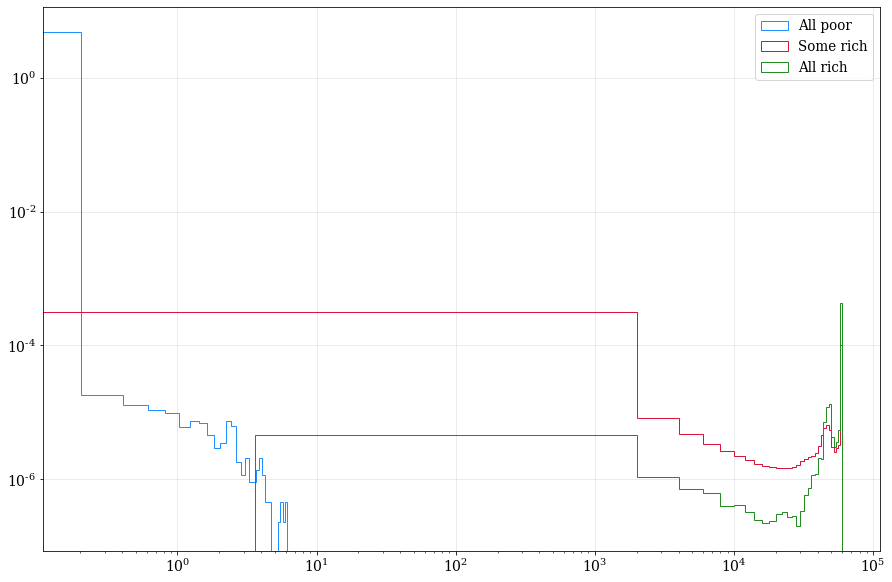

In [24]:
fig, axs = plt.subplots(1, figsize=(15,10))

plt.hist(np.concatenate(final_w_agent[0]), histtype="step", 
         bins=30, color="dodgerblue", density=True, label="All poor")
plt.hist(np.concatenate(final_w_agent[1]), histtype="step", 
         bins=30, color="crimson", density=True, label="Some rich")
plt.hist(np.concatenate(final_w_agent[2]), histtype="step", 
         bins=30, color="forestgreen", density=True, label="All rich")

plt.xscale("log")
plt.yscale("log")
fig.patch.set_facecolor('xkcd:white')
plt.legend()
plt.show()

In [25]:
del final_w_agent

# Distribution of final community wealths for each regime

In [3]:
final_w_comm = {0:[], 1:[], 2:[]}
for seed in os.listdir("DATA/nodebt/"):
    s = int(seed.split("_")[-1])
    for f in tqdm(os.listdir(f"DATA/nodebt/{seed}")):
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed}/{f}"))
        prop_richer = np.sum(data["W"][-1]>data["W"][0]) / num_agents
        if prop_richer == 0:
            pred = 0
        elif prop_richer < 1:
            pred = 1
        else:
            pred = 2
            
        alpha = data["params"][4]
        
        # retrieve communities from graph
        with open(f"sda_graphs/{s}_{alpha}.pickle", "rb") as f:
            communities, _, _, _ = pickle.load(f)
        NC = len(communities)
        
        # compute average community wealth trajectories
        data_W = data["W"]
        COMMUNITY_W = []
        for i,c in enumerate(communities):
            mean_comm_w = np.mean(data_W[-1, np.array(list(c))])
            COMMUNITY_W.append(mean_comm_w)
        
        final_w_comm[pred].append(COMMUNITY_W)

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

In [4]:
with open("notebooks/final_comm_w_data.pickle", "wb") as f:
    pickle.dump(final_w_comm, f)

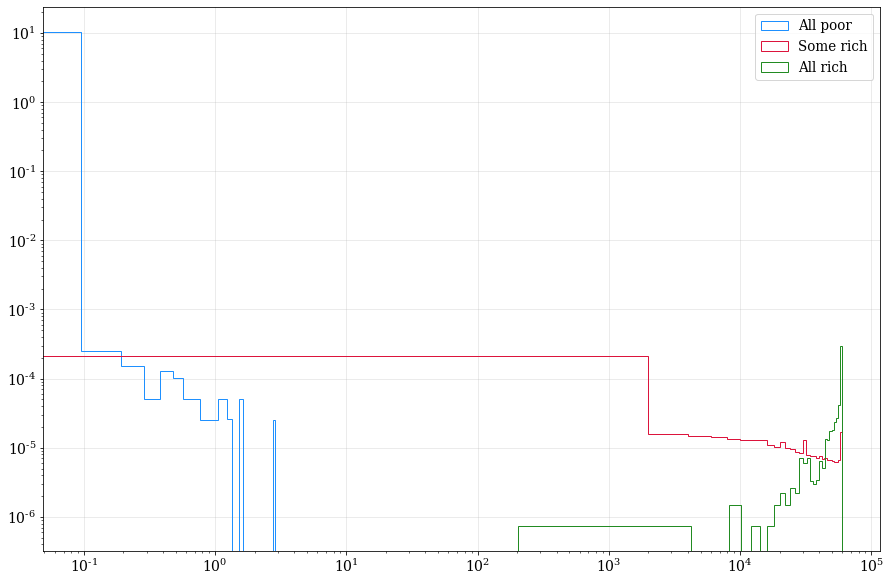

In [5]:
fig, axs = plt.subplots(1, figsize=(15,10))

plt.hist(np.concatenate(final_w_comm[0]), histtype="step", 
         bins=30, color="dodgerblue", density=True, label="All poor")
plt.hist(np.concatenate(final_w_comm[1]), histtype="step", 
         bins=30, color="crimson", density=True, label="Some rich")
plt.hist(np.concatenate(final_w_comm[2]), histtype="step", 
         bins=30, color="forestgreen", density=True, label="All rich")

plt.xscale("log")
plt.yscale("log")
fig.patch.set_facecolor('xkcd:white')
plt.legend()
plt.show()

In [6]:
del final_w_comm

# Distribution of final gini coefficients for each regime

In [2]:
def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    mean = np.mean(x) or 1
    rmad = mad/mean
    g = 0.5 * rmad
    return g

In [5]:
ginis = {0:[], 1:[], 2:[]}
for seed in os.listdir("DATA/nodebt/"):
    for f in tqdm(os.listdir(f"DATA/nodebt/{seed}")):
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed}/{f}"))["W"]
        prop_richer = np.sum(data[-1]>data[0]) / num_agents
        if prop_richer == 0:
            pred = 0
        elif prop_richer < 1:
            pred = 1
        else:
            pred = 2
        ginis[pred].append(gini(data[-1,:]))

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

  0%|          | 0/7168 [00:00<?, ?it/s]

In [25]:
with open("notebooks/final_ginis_data.pickle", "wb") as f:
    pickle.dump(ginis, f)

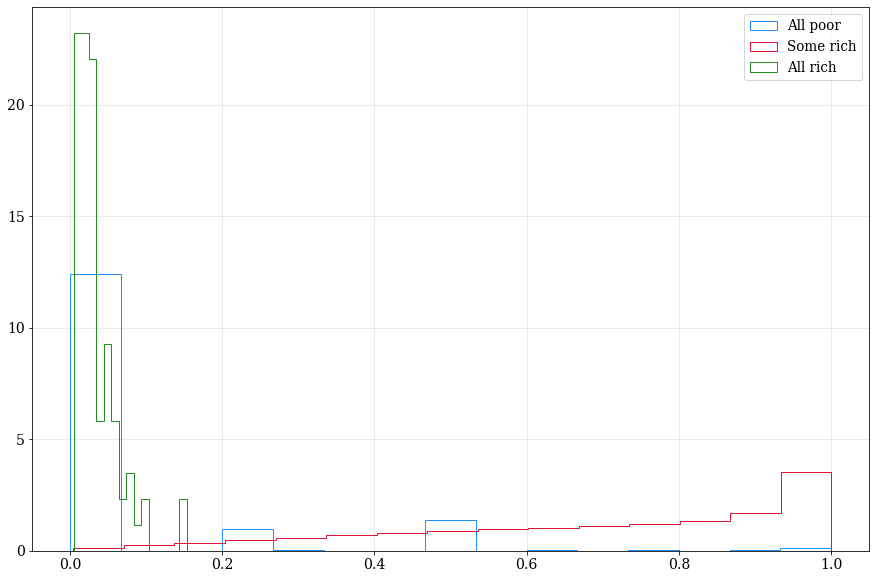

In [29]:
fig, axs = plt.subplots(1, figsize=(15,10))

plt.hist(ginis[0], histtype="step", 
         bins=15, color="dodgerblue", density=True, label="All poor")
plt.hist(ginis[1], histtype="step",
         bins=15, color="crimson", density=True, label="Some rich")
plt.hist(ginis[2], histtype="step", 
         bins=15, color="forestgreen", density=True, label="All rich")

# plt.xscale("log")
# plt.yscale("log")
fig.patch.set_facecolor('xkcd:white')
plt.legend()
plt.show()